In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ls

(11.04.2019)Sensors_Analysis_All_Data.ipynb
03-K Nearest Neighbors Project - Solutions.ipynb*
11.04.2019_sensor_section_classification.ipynb
19.04.2019_sensor_section_classification_ONLY_TWO_FEATURE.ipynb
SensorData_Automating_choosing_jumps_in_data_High_Quality_Picture.ipynb
SensorSection_spectrogram/
all_data/
destination_path.png
destination_path1.png
images/
new_02_2019.csv
new_02_2019_copy.csv
ramazan_ex.png
section_data/
see.png
test1.png
test2.png


In [135]:
df = pd.read_csv('new_02_2019.csv')

In [149]:
df=df.drop(columns='var')

In [150]:
'''

label2=np.arange(10)
label=np.arange(526)


#method to change label numbers
m=0
h=0
while True:
    for i in range(10):
        label[h]=m
        h=h+1
        print(h)
    h+10
    m=m+1
    if i>520:
        break
  
  
df=df.drop(columns='label')
df['label'] = label
df.head()

'''
    

"\n\nlabel2=np.arange(10)\nlabel=np.arange(526)\n\n\n#method to change label numbers\nm=0\nh=0\nwhile True:\n    for i in range(10):\n        label[h]=m\n        h=h+1\n        print(h)\n    h+10\n    m=m+1\n    if i>520:\n        break\n  \n  \ndf=df.drop(columns='label')\ndf['label'] = label\ndf.head()\n\n"

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


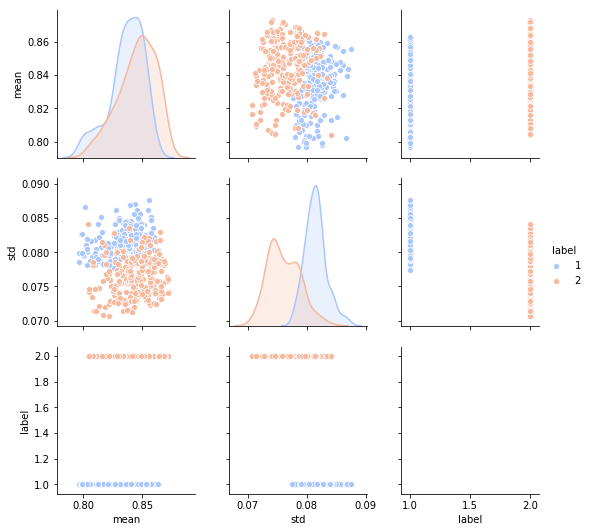

In [151]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='label',palette='coolwarm')

In [152]:
from sklearn.preprocessing import StandardScaler

In [153]:
scaler = StandardScaler()

In [154]:
scaler.fit(df.drop('label',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [155]:
scaled_features = scaler.transform(df.drop('label',axis=1))

In [156]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,mean,std
0,-0.397485,0.484441
1,-1.400247,0.213297
2,-0.983563,0.567056
3,0.226554,0.793204
4,-0.892855,1.488154


In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['label'],
                                                    test_size=0.30)

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn = KNeighborsClassifier(n_neighbors=1)

In [161]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [162]:
pred = knn.predict(X_test)

In [163]:
from sklearn.metrics import classification_report,confusion_matrix

In [164]:
print(confusion_matrix(y_test,pred))

[[60  7]
 [18 73]]


In [165]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83        67
           2       0.91      0.80      0.85        91

   micro avg       0.84      0.84      0.84       158
   macro avg       0.84      0.85      0.84       158
weighted avg       0.85      0.84      0.84       158



In [179]:
error_rate = []

# Will take some time
for i in range(1,41):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

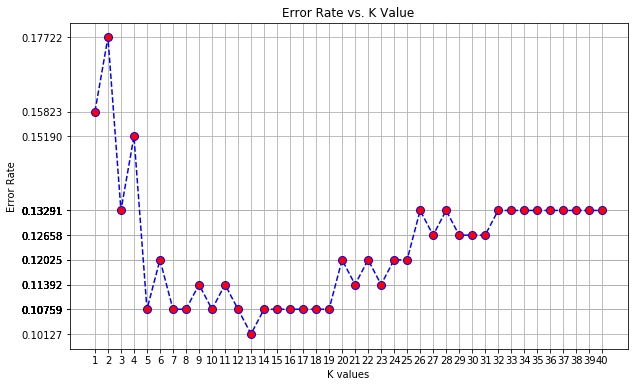

In [183]:
plt.figure(figsize=(10,6))
x=range(1,41)
plt.plot(x,error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.xticks(x)
plt.ylabel('Error Rate')
plt.yticks(error_rate)
plt.grid()

In [184]:
# NOW WITH K=14
knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=22')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=22


[[64  3]
 [18 73]]


              precision    recall  f1-score   support

           1       0.78      0.96      0.86        67
           2       0.96      0.80      0.87        91

   micro avg       0.87      0.87      0.87       158
   macro avg       0.87      0.88      0.87       158
weighted avg       0.88      0.87      0.87       158

